In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
import xarray as xr

In [2]:
# Define Directories
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Publish/Storm_Tracking/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Publish/Figures/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Genesis_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Genesis_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Genesis_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
# Edit Time Format
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(0,60,5)
Lon_Bins = Create_Bins(-95,0,5)

In [7]:
# Number of Years For Each Climate Scenario
Num_Years = numpy.array([90,93,93])

In [8]:
# Open Files
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [9]:
# Create Function to Plot ET Begin and Complete Locations
def Plot_ET_Locs(ET_DF, Model, i):
#
# Plot Tropical Peak Locations
    Axis = Fig.add_subplot(3,3,3*i+1, projection=ccrs.PlateCarree())
    ET_DF_Trop_Peak = ET_DF[ET_DF["Trop Peak SLP"] <= 1000]
    Trop_Peak_Lats = numpy.array(ET_DF_Trop_Peak["Trop Peak Lat"])
    Trop_Peak_Lons = numpy.array(ET_DF_Trop_Peak["Trop Peak Lon"])
    for k in range(len(Trop_Peak_Lats)):
        pyplot.scatter(Trop_Peak_Lons[k], Trop_Peak_Lats[k], marker='*', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i, -100, 0, 0, 60)
    Title = Model + ": Trop Peak Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Begin Locations
    Axis = Fig.add_subplot(3,3,3*i+2, projection=ccrs.PlateCarree())
    ET_DF_Begin = ET_DF[ET_DF["ET Begin SLP"] <= 1008]
    Begin_Lats = numpy.array(ET_DF_Begin["ET Begin Lat"])
    Begin_Lons = numpy.array(ET_DF_Begin["ET Begin Lon"])
    for k in range(len(Begin_Lats)):
        pyplot.scatter(Begin_Lons[k], Begin_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+1, -100, 0, 0, 60)
    Title = Model + ": ET Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET Complete Data
    Axis = Fig.add_subplot(3,3,3*i+3, projection=ccrs.PlateCarree())
    ET_DF_Compl = ET_DF[ET_DF["ET Complete SLP"] <= 1008]
    Compl_Lats = numpy.array(ET_DF_Compl["ET Complete Lat"])
    Compl_Lons = numpy.array(ET_DF_Compl["ET Complete Lon"])
    for k in range(len(Compl_Lats)):
        pyplot.scatter(Compl_Lons[k], Compl_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=28)
    Plot_Map_Formatting(Axis, 3*i+2, -100, 0, 0, 60)
    Title = Model + ": ET Completion Locations"
    Axis.set_title(Title, fontsize=24)

In [10]:
# Formatting
def Plot_Map_Formatting(Axis, Plot, x_Min, x_Max, y_Min, y_Max):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    Letter_Label(Axis, Plot)

In [11]:
# Create Subsets For Each Storm Phase
def Phase_Subsets(Data):
    Subset_0 = Data[Data["SLP(hPa)"] <= 1008].reset_index()
    Subset_Trop = Subset_0[Subset_0["Storm Phase"] == "Tropical"]
    Subset_Trans = Subset_0[Subset_0["Storm Phase"] == "Transition"]
    Subset_Extra = Subset_0[Subset_0["Storm Phase"] == "Extratropical"]
    return (Subset_0, Subset_Trop, Subset_Trans, Subset_Extra)

In [12]:
# Count ET Locations Distribution
def Loc_Count(DF, Lat_Var, Lon_Var, Lat_Min, Lat_Max, Lon_Min, Lon_Max, Params_Lat, Params_Lon):
    Count_Total = 0
    for m in range(len(Params_Lat)):
        for n in range(len(Params_Lon)):
            Param_Lat, Param_Lon = Params_Lat[m], Params_Lon[n]
            Subset = DF[(DF[Lat_Var] >= Lat_Min-Param_Lat) & (DF[Lat_Var] <= Lat_Max+Param_Lat) &
            (DF[Lon_Var] >= Lon_Min-Param_Lon) & (DF[Lon_Var] <= Lon_Max+Param_Lon)]
            Count = len(Subset)
            Count_Total += Count
    Count_Final = Count_Total / (len(Params_Lat) * len(Params_Lon))
    return (Count_Final)

In [13]:
# Create Function to Calculate Track Density By Phase
def Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model):
# Create Subsets Based on Phase
    Subset_0, Subset_Trop, Subset_Trans, Subset_Extra = Phase_Subsets(Data_DF)
    Trop_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Trans_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
    Extra_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
#
# Count Distribution of Datapoints By Phase
    Params_Lat = Create_Bins(0,5,1.25)
    Params_Lon = Create_Bins(0,5,1.25)
    for j in range(len(Lat_Bins)-1):
        for k in range(len(Lon_Bins)-1):
            Trop_Count[j][k] = Loc_Count(Subset_Trop, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon)
            Trans_Count[j][k] = Loc_Count(Subset_Trans, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon)
            Extra_Count[j][k] = Loc_Count(Subset_Extra, "Lat", "Lon", Lat_Bins[j], Lat_Bins[j+1], \
            Lon_Bins[k], Lon_Bins[k+1], Params_Lat, Params_Lon)
#
# Calculate Density
    Trop_Density = Trop_Count / numpy.sum(Trop_Count) * 1000
    Trans_Density = Trans_Count / numpy.sum(Trans_Count) * 1000
    Extra_Density = Extra_Count / numpy.sum(Extra_Count) * 1000
    return (Trop_Density, Trans_Density, Extra_Density)

In [14]:
# Create Function to Plot Track Density Based on Phase
def Phase_Distr_Plot(Data_DF, Model, i, Bounds, Colours, Colourbar):
# Use Function to Calculate Distributions
    Spatial_Trop, Spatial_Trans, Spatial_Extra = Phase_Locs_Distr(Data_DF, Lat_Bins, Lon_Bins, Model)
#
# Plot Tropical Track Density
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trop)):
        for k in range(len(Spatial_Trop[0])):
            Colour = Spatial_Colour(Spatial_Trop[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model + ": Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Track Density
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Trans)):
        for k in range(len(Spatial_Trans[0])):
            Colour = Spatial_Colour(Spatial_Trans[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model + ": Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Track Density
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Extra)):
        for k in range(len(Spatial_Extra[0])):
            Colour = Spatial_Colour(Spatial_Extra[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model + ": Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [15]:
# Calculate Difference Between Models
def Phase_Locs_Diff(DF_1, DF_2, Model_1, Model_2):
    Trop_1, Trans_1, Extra_1 = Phase_Locs_Distr(DF_1, Lat_Bins, Lon_Bins, Model_1)
    Trop_2, Trans_2, Extra_2 = Phase_Locs_Distr(DF_2, Lat_Bins, Lon_Bins, Model_2)
    Trop_Diff = Trop_1 - Trop_2
    Trans_Diff = Trans_1 - Trans_2
    Extra_Diff = Extra_1 - Extra_2
    return (Trop_Diff, Trans_Diff, Extra_Diff)

In [16]:
# Create Function to Plot Track Density Differences By Phase
def Phase_Diff_Plot(Data_DF_1, Data_DF_2, Model_1, Model_2, i, Bounds, Colours, Colourbar):
    Trop_Diff, Trans_Diff, Extra_Diff = Phase_Locs_Diff(Data_DF_1, Data_DF_2, Model_1, Model_2)
#
# Plot Tropical Track Density Difference
    Axis = Fig.add_subplot(3,3,i*3+1, projection=ccrs.PlateCarree())
    for j in range(len(Trop_Diff)):
        for k in range(len(Trop_Diff[0])):
            Colour = Spatial_Diff_Colour(Trop_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Tropical Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Plot Transitioning Track Density Difference
    Axis = Fig.add_subplot(3,3,i*3+2, projection=ccrs.PlateCarree())
    for j in range(len(Trans_Diff)):
        for k in range(len(Trans_Diff[0])):
            Colour = Spatial_Diff_Colour(Trans_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+1, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Transitioning Track Density"
    Axis.set_title(Title, fontsize=20)
#
# Colour Bar
    if Colourbar == True:
        Cbar_Label = 'Frequency Diff (Per 1000 Data Points)'
        C_Map = mcolors.LinearSegmentedColormap.from_list("Frequency of Locations", Colours, N=len(Colours))
        Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
        Cax = Axis.inset_axes([0.05, -0.14, 0.9, 0.05], transform=Axis.transAxes)
        Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
        label=Cbar_Label)
#
# Plot Extratropical Track Density Difference
    Axis = Fig.add_subplot(3,3,i*3+3, projection=ccrs.PlateCarree())
    for j in range(len(Extra_Diff)):
        for k in range(len(Extra_Diff[0])):
            Colour = Spatial_Diff_Colour(Extra_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis, i*3+2, -100, 0, 0, 60)
    Title = Model_1 + " - " + Model_2 + ": Diff in Extratropical Track Density"
    Axis.set_title(Title, fontsize=20)

In [17]:
# Create Function For Track Density Colours
Phase_Colours = ['lightskyblue', 'deepskyblue', 'lightseagreen', 'limegreen', 'greenyellow', 'yellow', 'orange', 'darkorange', 'red']
Phase_Bounds = numpy.array([0,2.5,5,7.5,10,15,20,25,30])
#
def Spatial_Colour(Density, Bounds, Colours):
    for k in range(len(Colours)):
        if Density == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Density, bins=Bounds[1:], right=True)
            Colour = Colours[Bin]
    return (Colour)

In [18]:
# Create Function For Track Density Difference Colours
Phase_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'red']
Phase_Diff_Bounds = numpy.array([-8,-6,-4,-2,2,4,6,8])
#
def Spatial_Diff_Colour(Diff, Bounds, Colours):
    for k in range(len(Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            Bin = numpy.digitize(Diff, bins=Bounds, right=True)
            Colour = Colours[Bin]
    return (Colour)

In [19]:
# Letter Labels
def Letter_Label(Axis, Plot):
    Fig_Labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
    Axis.text(0.03, 0.92, str(Fig_Labels[int(Plot)]), ha='center', va='center', \
    transform=Axis.transAxes, fontdict={'size':24},color='black')

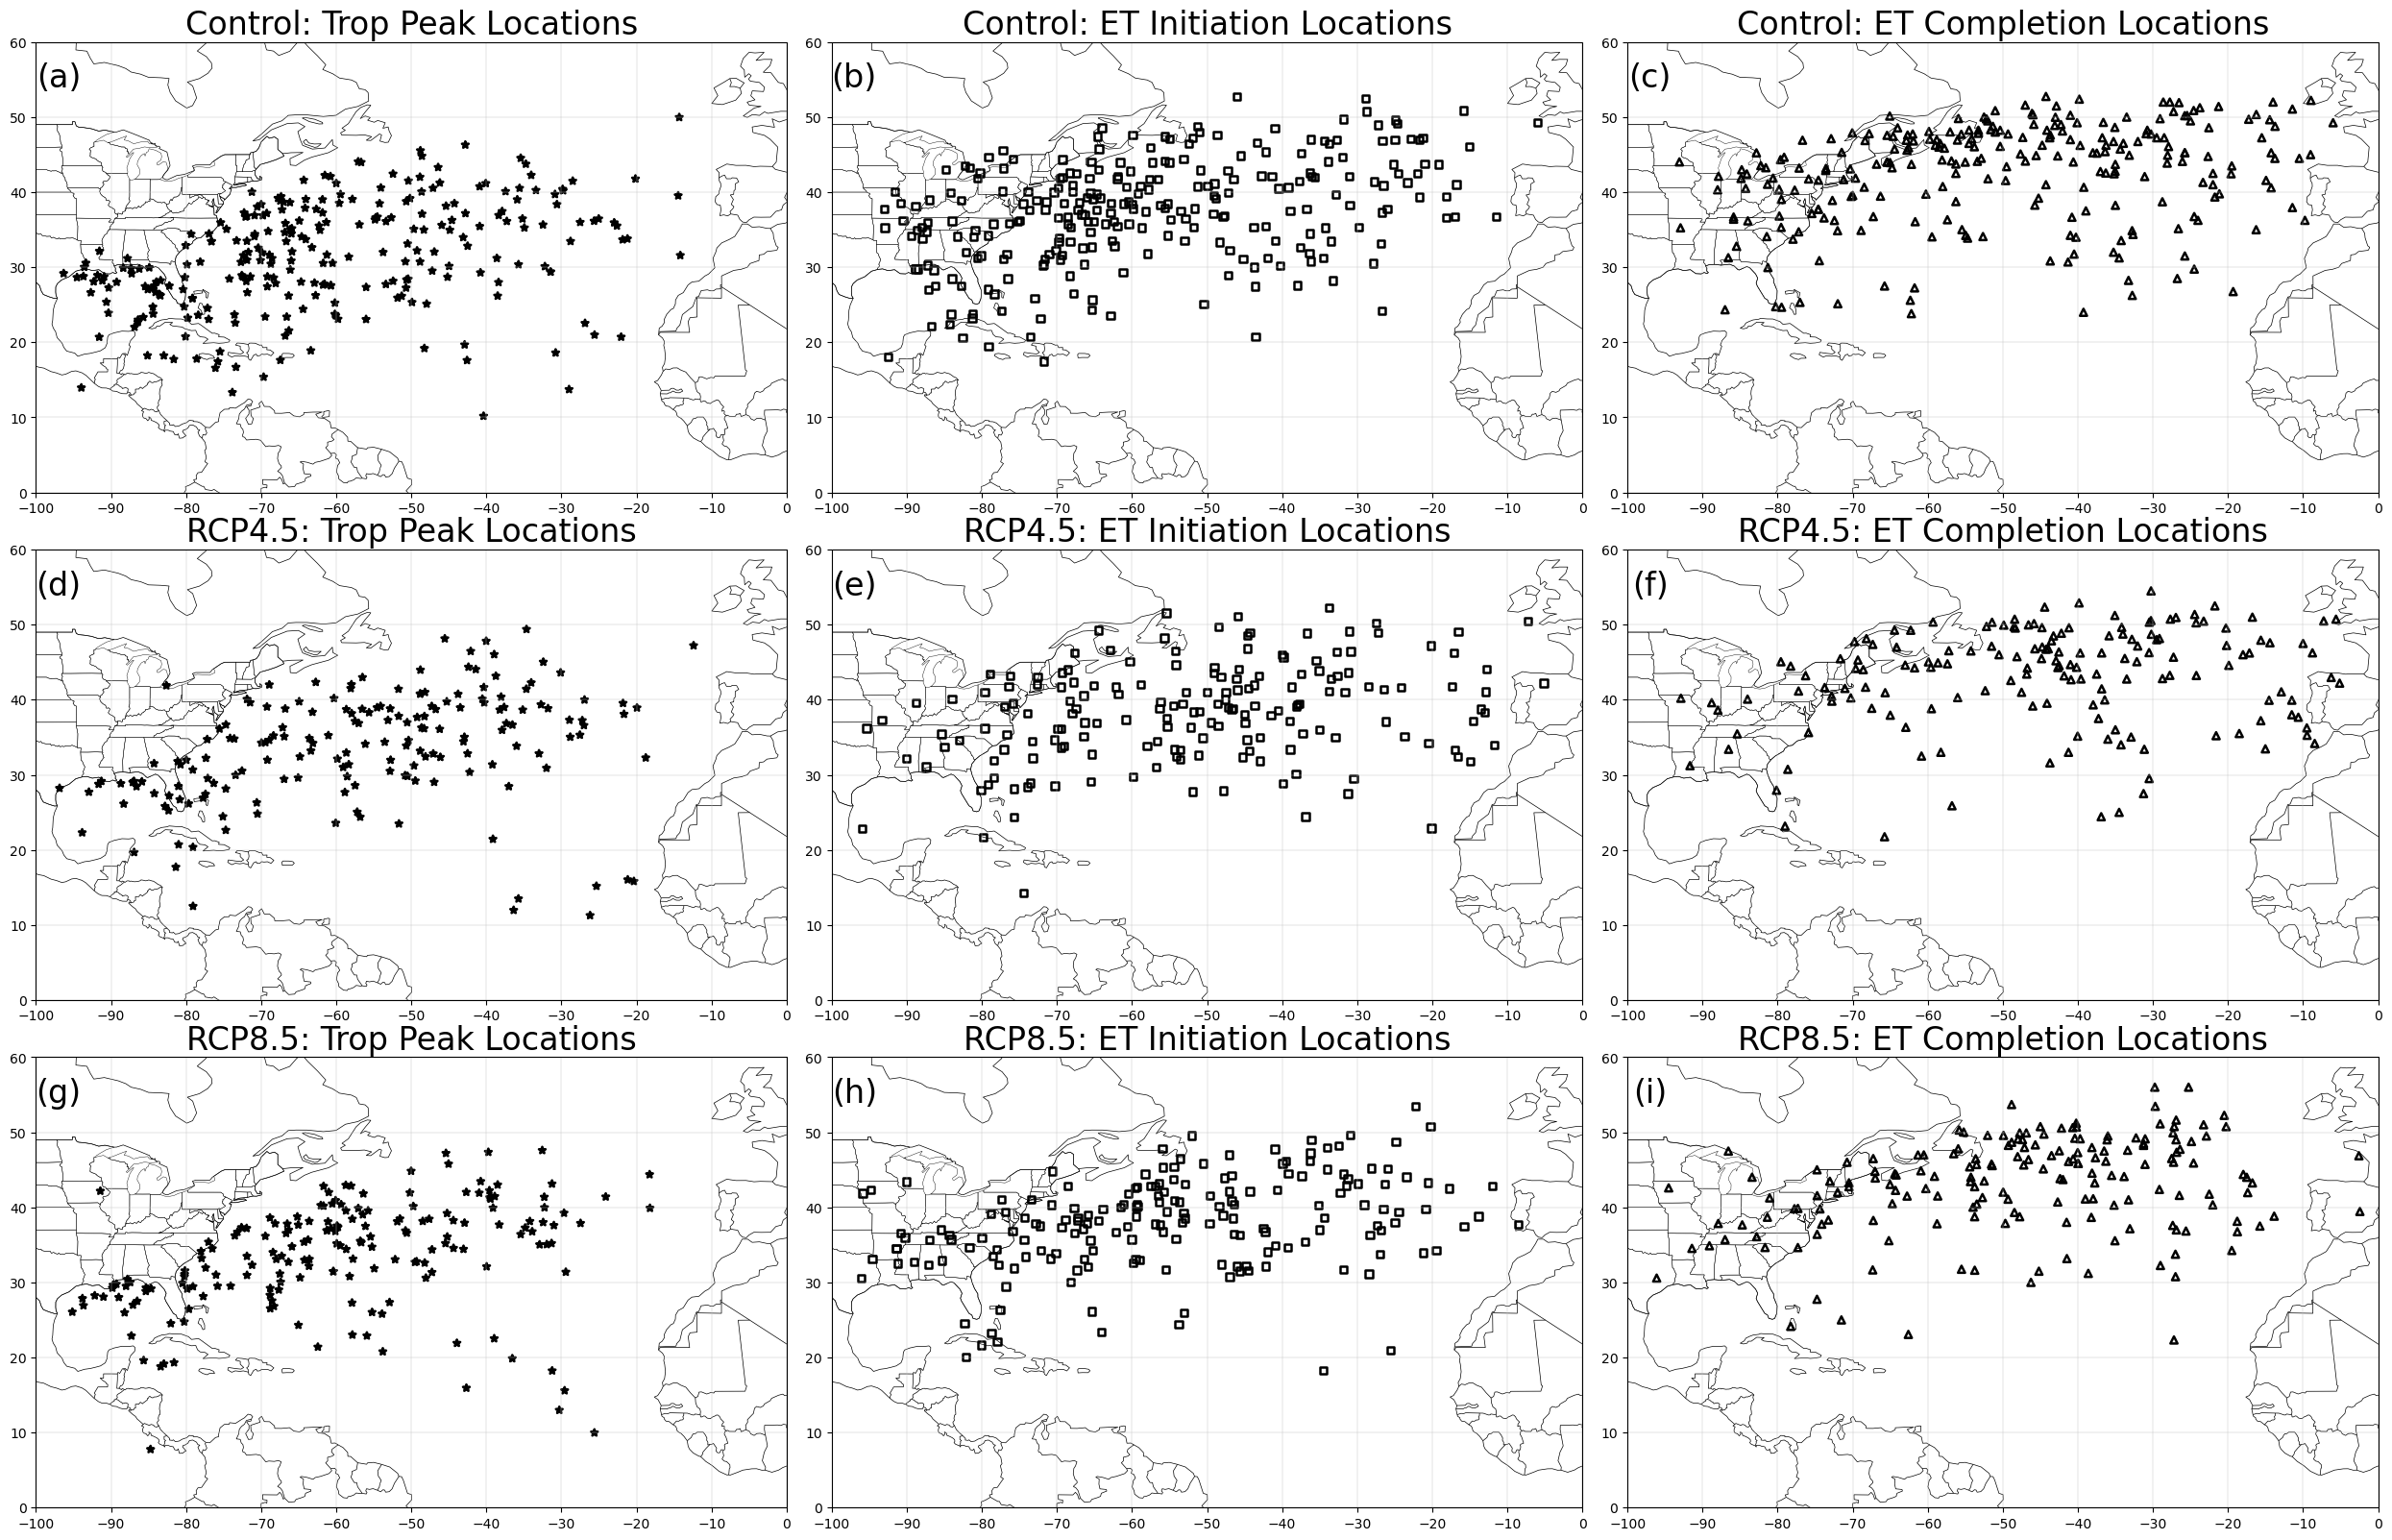

In [20]:
# Figure B9
# Plot Tropical Peak, ET Initiation and ET Completion Locations
Fig = pyplot.figure(figsize=(25,16))
Plot_ET_Locs(Control_ET, "Control", 0)
Plot_ET_Locs(RCP45_ET, "RCP4.5", 1)
Plot_ET_Locs(RCP85_ET, "RCP8.5", 2)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Figure_B9.png', bbox_inches='tight')

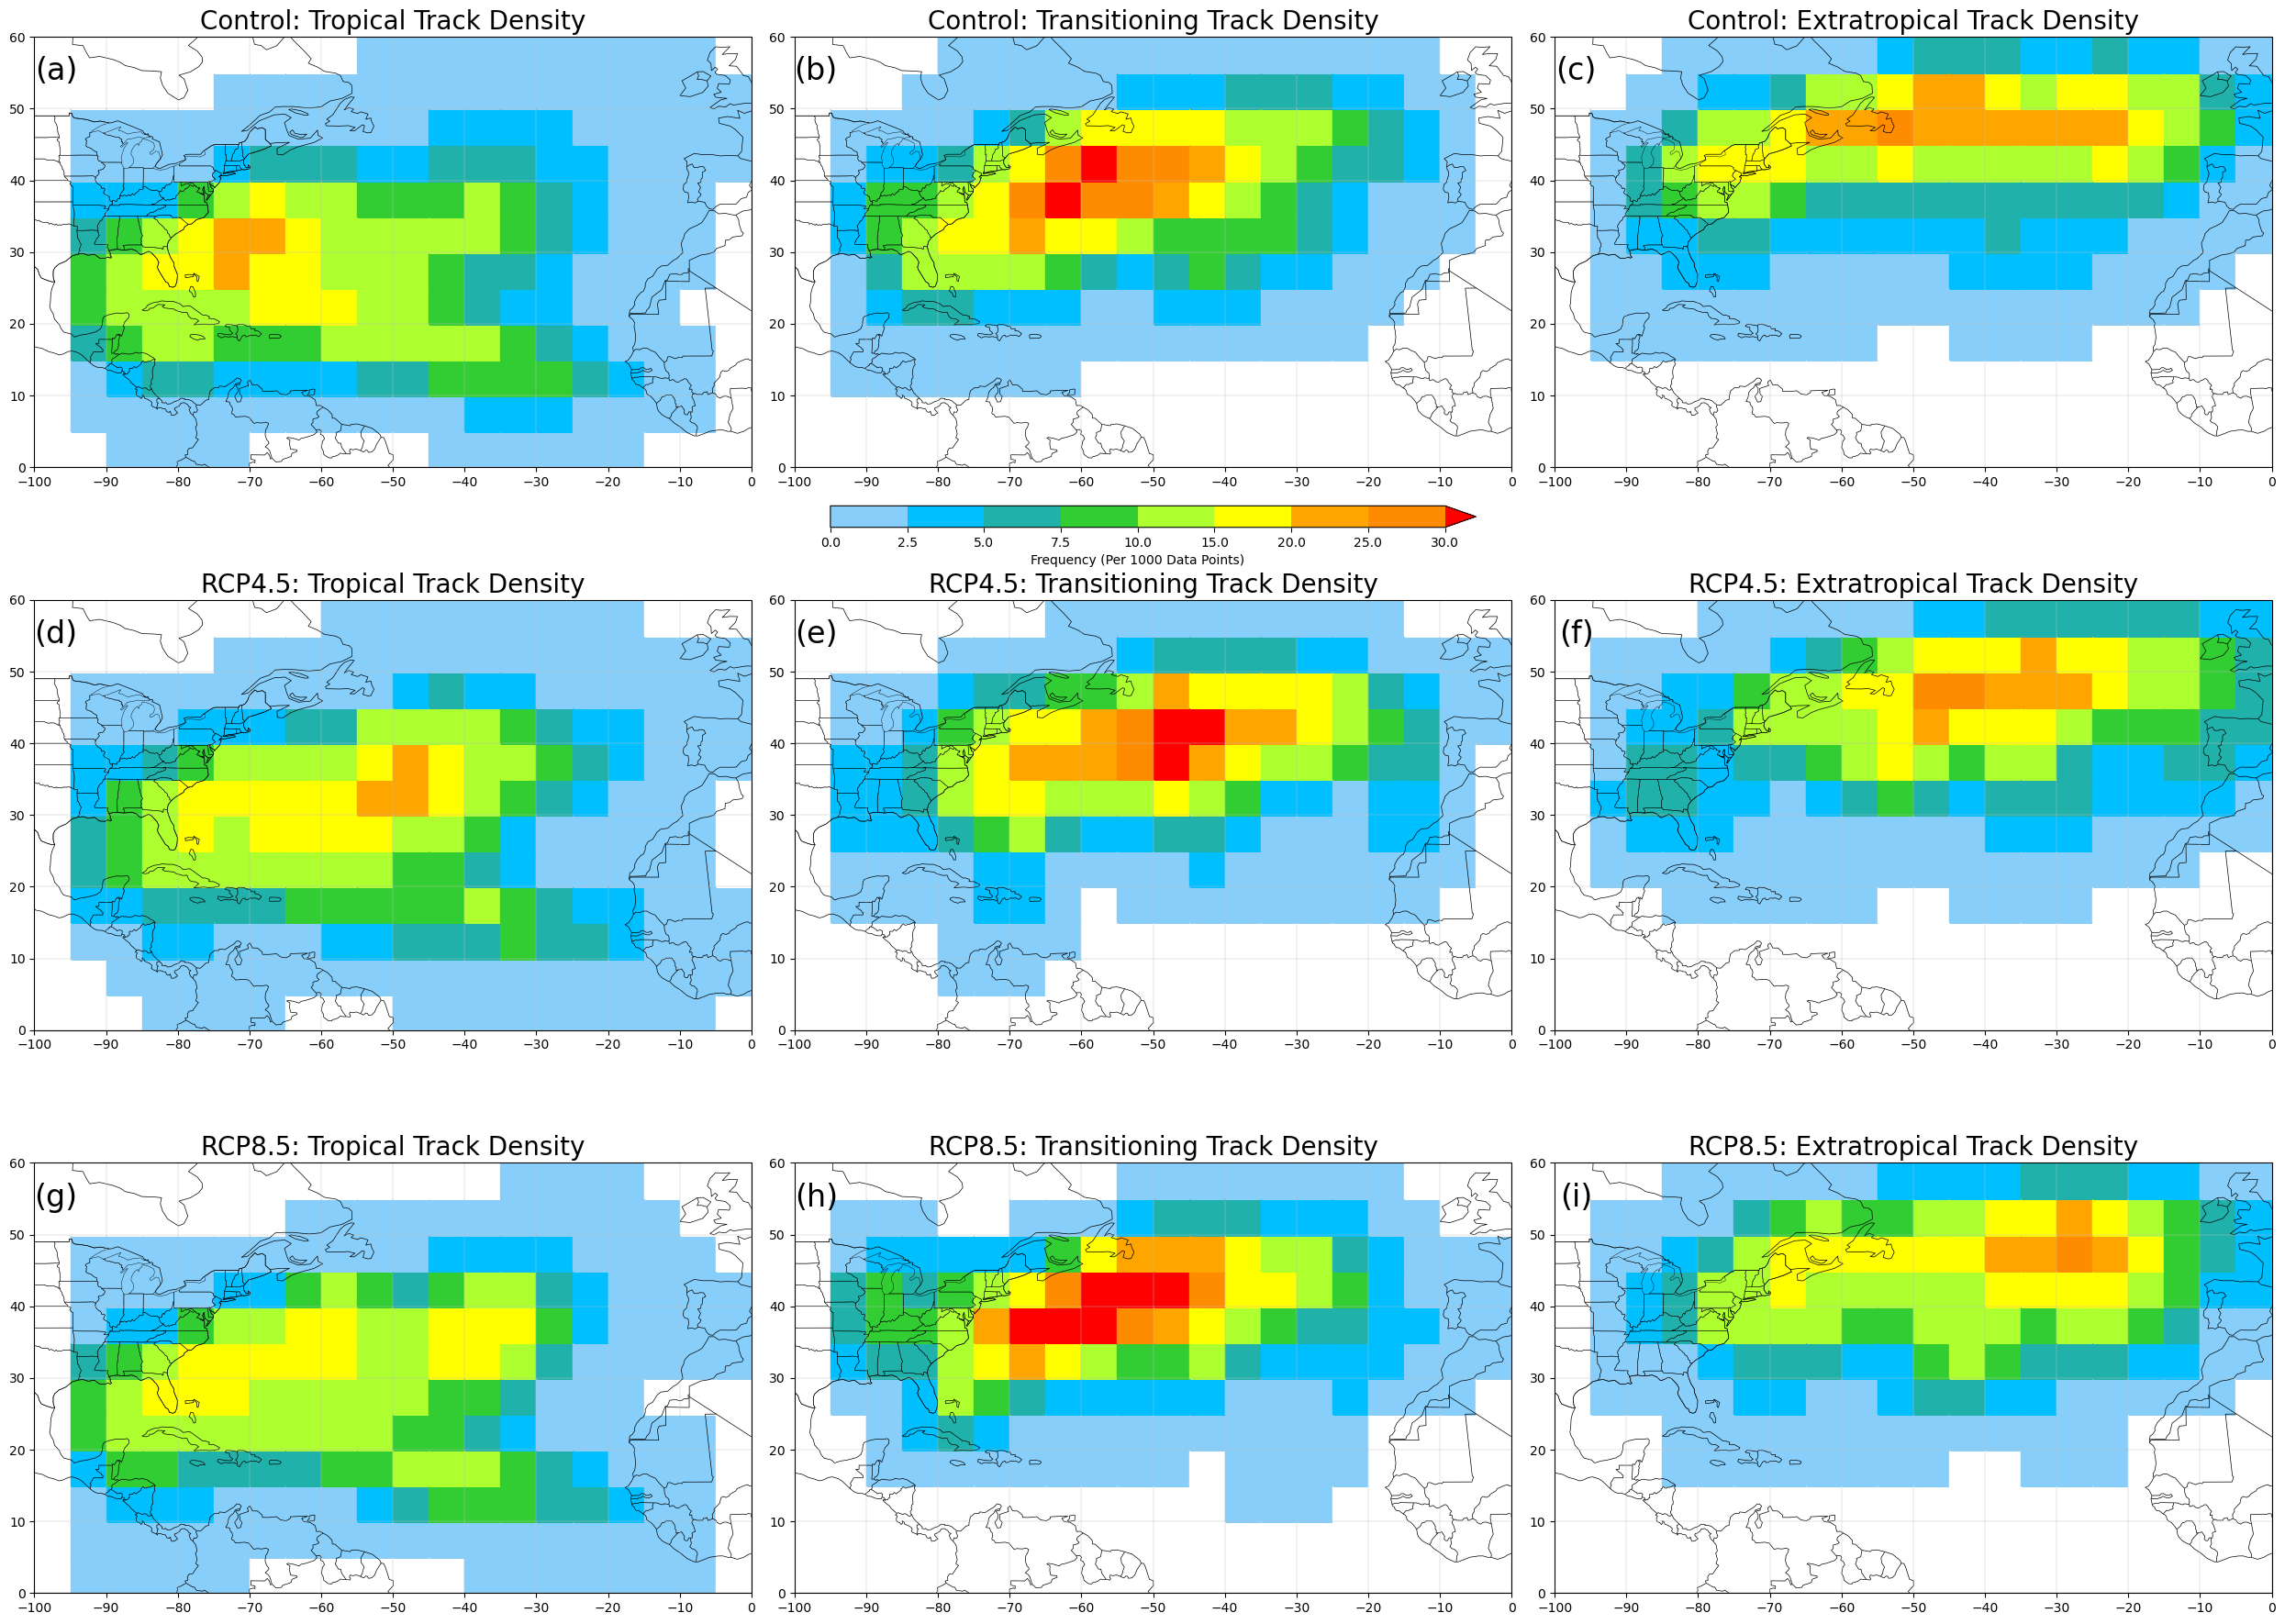

In [21]:
# Figure B8
# Plot Track Density By Storm Phase
Fig = pyplot.figure(figsize=(25,18))
Phase_Distr_Plot(Control_Data, "Control", 0, Phase_Bounds, Phase_Colours, True)
Phase_Distr_Plot(RCP45_Data, "RCP4.5", 1, Phase_Bounds, Phase_Colours, False)
Phase_Distr_Plot(RCP85_Data, "RCP8.5", 2, Phase_Bounds, Phase_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Figure_B8.png', bbox_inches='tight')

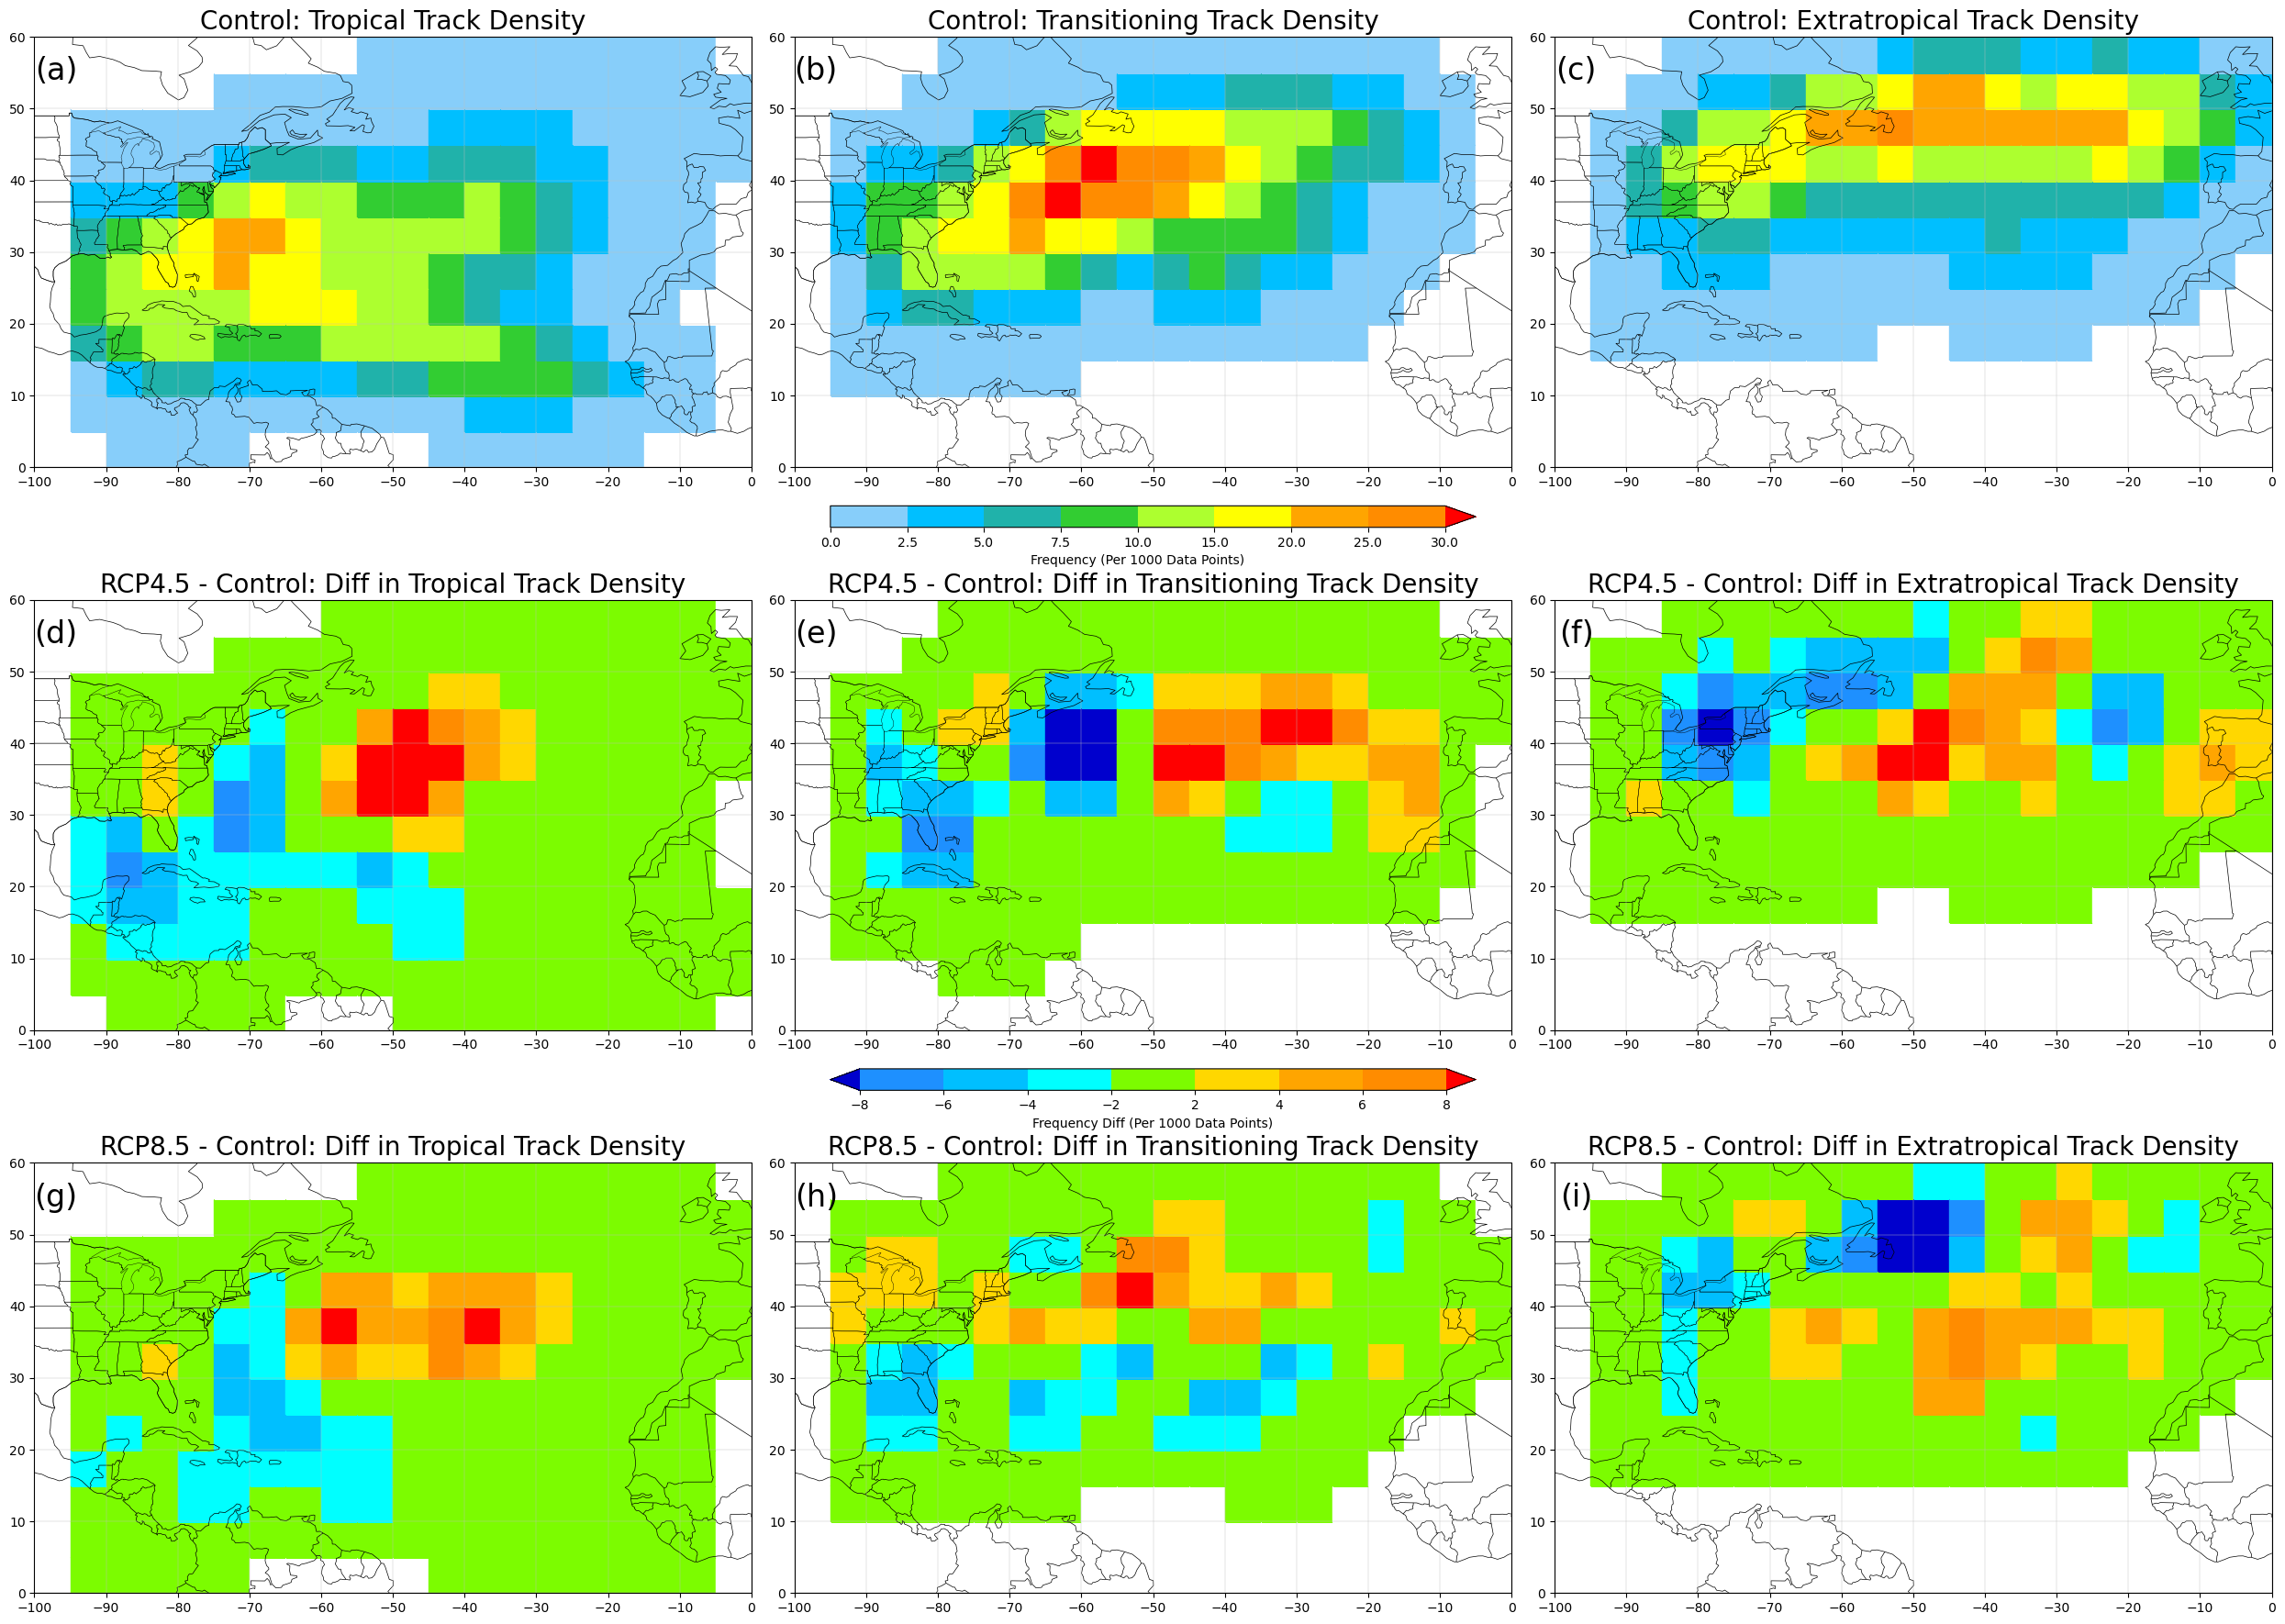

In [22]:
# Figure 8
# Plot Differences Between Track Densities By Storm Phase
Fig = pyplot.figure(figsize=(25,18))
Phase_Distr_Plot(Control_Data, "Control", 0, Phase_Bounds, Phase_Colours, True)
Phase_Diff_Plot(RCP45_Data, Control_Data, "RCP4.5", "Control", 1, Phase_Diff_Bounds, Phase_Diff_Colours, True)
Phase_Diff_Plot(RCP85_Data, Control_Data, "RCP8.5", "Control", 2, Phase_Diff_Bounds, Phase_Diff_Colours, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Figure_8.png', bbox_inches='tight')

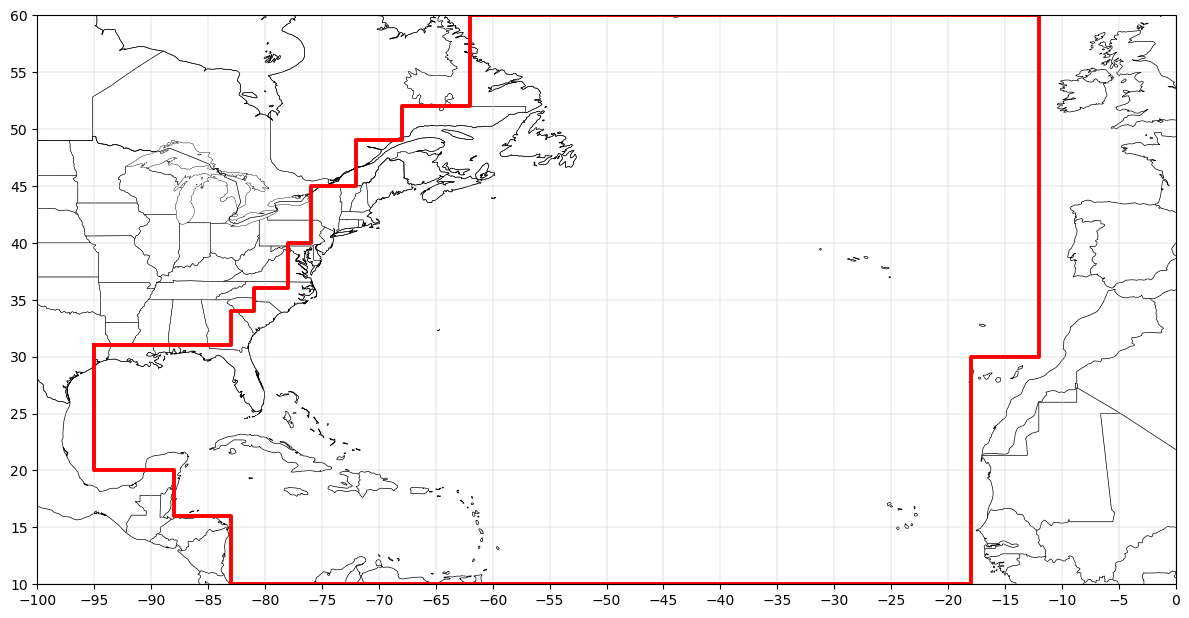

In [23]:
# Figure B1
# Plot Geographical Bounds For Subset C
Fig = pyplot.figure(figsize=(12,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines(linewidth=0.5)
Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
Axis.add_feature(cfeature.STATES, linewidth=0.3)
x_Min, x_Max, y_Min, y_Max = -100,0,10,60
x_Axis = Create_Bins(x_Min, x_Max, 5)
y_Axis = Create_Bins(y_Min, y_Max, 5)
pyplot.xticks(x_Axis)
pyplot.yticks(y_Axis)
pyplot.xlim(x_Min,x_Max)
pyplot.ylim(y_Min,y_Max)
pyplot.grid(linewidth=0.3, color='silver', linestyle='-')
pyplot.plot(\
[-95,-83,-83,-81,-81,-78,-78,-76,-76,-72,-72,-68,-68,-62,-62,-12,-12,-18,-18,-83,-83,-88,-88,-95,-95], \
[31,31,34,34,36,36,40,40,45,45,49,49,52,52,60,60,30,30,10,10,16,16,20,20,31], c='red', linewidth=2.8)
Fig.tight_layout()
Fig.savefig(Output_Diri+'Figure_B1.png', bbox_inches='tight')